# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [2]:
import pandas as pd

import numpy as np

%matplotlib inline

In [3]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values=['-','Nan'])
df.head(2)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN


## 1. Read in the file using pandas, and look at the first five rows

In [4]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [5]:
df.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

In [6]:
df =df.rename(columns={
    'Full-flowering date (DOY)': 'Full_flowering_date_DOY',
    'Full-flowering date': 'Full_flowering_date',
    'Source code':'Source_code',
    'Data type code':'Data_type_code',
    'Reference Name':'Reference_Name'
})

df.head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 3. Look at the final five rows of the data

In [7]:
df.head(5)

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

## 4. What source is the most common as a reference?

In [8]:
df.Reference_Name.value_counts().head()

NEWS-PAPER(ARASHIYAMA)    94
SUGIURAKE-NIKKI           38
MYOHOIN-HINAMIKI          32
OYUDONONO-UENO-NIKKI      26
DAIGOJI-ZATSUYO           21
Name: Reference_Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [9]:
[df.Full_flowering_date_DOY.notnull()]
df.head()


,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

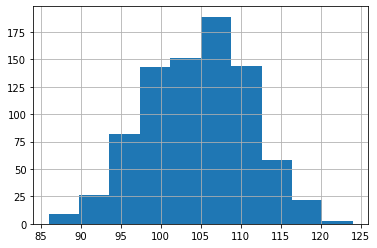

In [10]:
df.Full_flowering_date_DOY.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

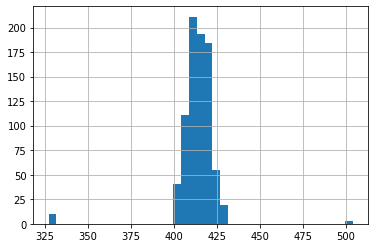

In [11]:
df.Full_flowering_date.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [12]:
df.Full_flowering_date_DOY.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full_flowering_date_DOY, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [13]:
df[(df.AD<1990)].Full_flowering_date_DOY.median()

105.0

## 11. How about after 1900?

In [14]:
df[(df.AD>1990)].Full_flowering_date_DOY.median()

97.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [15]:
df.Data_type_code.value_counts()

2.0    454
1.0    166
0.0    124
4.0     39
3.0     30
8.0     11
9.0      3
Name: Data_type_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [40]:
df[df.Data_type_code == 4].AD.head()

90     891
94     895
95     896
122    923
154    955
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

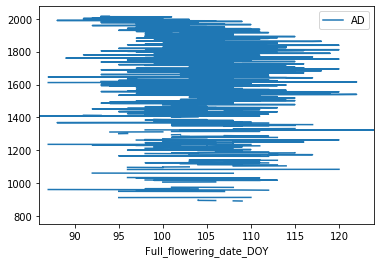

In [17]:
df.plot(x='Full_flowering_date_DOY', y='AD')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [29]:
smooth = df.rolling(10, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean().dropna()
smooth.head()


94    106.200000
95    105.833333
96    105.833333
97    105.833333
98    106.200000
Name: Full_flowering_date_DOY, dtype: float64

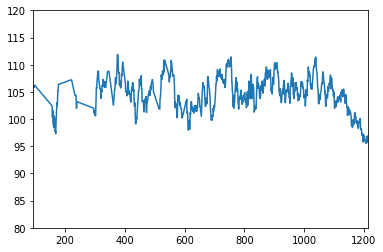

In [30]:
smooth.plot(x='Full_flowering_date_DOY', y='AD', ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [85]:
df.loc[df['Full_flowering_date'] < 400, 'month'] = 'March'
df.head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,month
0,801,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.loc[(df['Full_flowering_date'] > 400) & (df['Full_flowering_date']<500),'month'] = 'April'
df.head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,month
0,801,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.loc[df['Full_flowering_date'] > 500, 'month'] = 'May'
df.head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,month
0,801,NaN,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN,NaN


### 17. Using your new column, how many blossomings happened in each month?

In [95]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

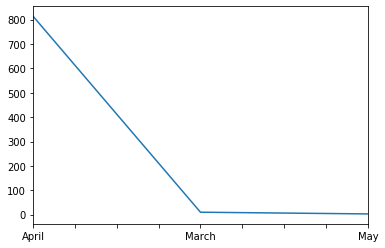

In [98]:
month_graph = df.month.value_counts()
month_graph.plot()



## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [101]:
df.dtypes
# df['Full_flowering_date'].str.replace('^.','')

AD                           int64
Full_flowering_date_DOY    float64
Full_flowering_date        float64
Source_code                float64
Data_type_code             float64
Reference_Name              object
month                       object
dtype: object

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [102]:
df['Full_flowering_date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full_flowering_date, dtype: int32

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [1]:
df['day-of-month'] = (df['Full_flowering_date'].dropna().astype(int).astype(str).apply(lambda value: value[1]+ value[2]))

df.head()

NameError: name 'df' is not defined

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [156]:
df["date"] = df["month"].map(str) + " " + df["day-of-month"]
df.dropna().head()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,month,day-of-month,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April,01,April 01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April,15,April 15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April,06,April 06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,18,April 18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,14,April 14


# YOU ARE DONE.

And **incredible.**

In [155]:
# Whooo!